In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

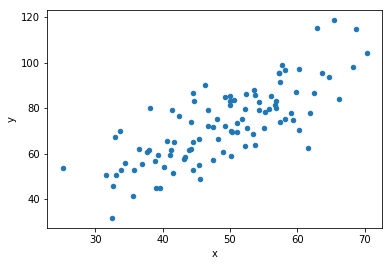

In [183]:
df_raw = pd.read_csv('../l1_data.csv', names=['x', 'y'])
df_raw.plot.scatter(x='x', y='y', style='o')
plt.show()

In [184]:
def split_data(df):
    return df.iloc[:, :-1], df.iloc[:, -1:]

x, y = split_data(df_raw)

x = x.as_matrix()
y = y.as_matrix()

In [185]:
def train(x, y, iter=20, learn_rate=0.0001, reg_rate=2):
    examples, features = x.shape
    theta = np.zeros((features + 1, 1))
    b = np.ones((examples, 1))
    x_b = np.column_stack((b, x))
    costs = []
    for i in range(iter):
        h = np.dot(theta.T, x_b.T)
        cost = (1 / (2 * examples)) * np.dot((h - y.T), (h - y.T).T)
        cost_regualarization = reg_rate / (2 * examples) * np.sum(theta[1:] ** 2)
        cost += cost_regualarization
        grad = (1 / examples) * np.dot(x_b.T, (h - y.T).T)
        grad_regularization = (reg_rate / examples) * theta[1:]
        grad += grad_regularization
        costs = [*costs, np.asscalar(cost)]
        theta = theta - learn_rate * grad
    return theta, costs

theta, costs = train(x, y)

In [186]:
def plot_data(data, predicted, costs):
    x, y = data
    fig, (g1, g2) = plt.subplots(nrows=2, ncols=1)
    g1.plot(x.flatten(), y.flatten(), 'bo')
    g1.plot(x.flatten(), predicted.flatten(), 'go')
    g1.axis([x.min() - x.mean() / 10, x.max() + x.mean()/ 10, y.min() - y.mean()/ 10, y.max() + y.mean()/ 10])
    g2.plot(costs)
    plt.show()

In [187]:
def predict(theta, x):
    examples, features = x.shape
    b = np.ones((examples, 1))
    x_b = np.column_stack((b, x))
    y = np.dot(theta.T, x_b.T)
    return y

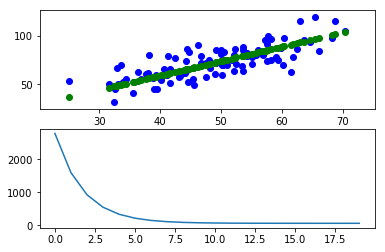

In [188]:
plot_data((x, y), predict(theta, x), costs)